<a href="https://colab.research.google.com/github/Tyler-SkyCicci/Phys202L/blob/main/Ohms_Law_Analysis_ODR(Alex_Zannelli%2C_Tyler_Cicci%2C_Noah_Kneessi%2C_Atticus_Winkfield).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4: Ohm's Law

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
#NAMES: Alex Zannelli, Tyler Cicci, Noah Kneessi, Atticus Winkfield

# The following lines make plots in dark mode look reasonable.  If you are not using dark
# mode you don't need them, but you can also just leave them here and it should work fine.

dark_mode = False
# plotting choices for dark-mode
if (dark_mode):
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
    linecolor = 'w'
else:
    linecolor = 'k'

# Raw Data


In [2]:
# Create a Pandas DataFrame with data for calibration of Torsion pendulum

# The data elements are [Voltage in V, error in Voltage in V, current in mA, error in current in mA]
lightbulb_data = [[0.518, 0.05, 64.1, 0.1], [0.9968, 0.05, 87.6, 0.1], 
                 [1.481, 0.05, 109.8, 0.1], [2.024, 0.05, 130.0, 0.1], 
                 [2.531, 0.05, 147.1, 0.1], [2.968, 0.05, 158.1, 0.1], 
                 [3.517, 0.05, 170.6, 0.1], [3.98, 0.05, 186.9, 0.1], 
                 [4.52, 0.05, 201.7, 0.1], [5.04, 0.05, 215.5, 0.1], [5.48, 0.05, 226.2, 0.1], [6.00, 0.05, 238.6, 0.1]]

resistor_data = [[0.976, 0.03, 0.09, 0.01], [1.957, 0.03, 0.19, 0.01], 
                 [2.992, 0.03, 0.29, 0.01], [3.959, 0.03, 0.39, 0.01], 
                 [4.96, 0.03, 0.49, 0.01], [6.05, 0.03, 0.60, 0.01], 
                 [6.99, 0.03, 0.69, 0.01], [8.02, 0.03, 0.79, 0.01], 
                 [9.01, 0.03, 0.89, 0.01], [10.01, 0.03, 0.99, 0.01],
                 [10.98, 0.03, 1.09, 0.01], [12.04, 0.03, 1.19, 0.01],
                 [12.95, 0.03, 1.28, 0.01], [14.0, 0.03, 1.39, 0.01],
                 [14.96, 0.03, 1.49, 0.01], [16.00, 0.03, 1.59, 0.01], 
                 [17.00, 0.03, 1.69, 0.01], [18.03, 0.03, 1.79, 0.01], 
                 [19.00, 0.03, 1.89, 0.01], [20.00, 0.03, 1.99, 0.01], 
                 [20.94, 0.03, 2.09, 0.01], [22.02, 0.03, 2.20, 0.01]]

diode_forward_data_current = [0.001,0.011,0.023,0.029,0.042,0.049,0.058,0.072,0.079,0.086,0.102,0.194,0.293,0.416,0.484,1.044,1.483,2.021,2.401,3.182,5.16,20.79,36.28,50.0,94.9,196.5,309.4,392.4]
diode_forward_data_voltage = [0.346,0.425,0.450,0.458,0.471,0.476,0.482,0.490,0.493,0.496,0.502,0.526,0.524,0.556,0.562,0.594,0.610,0.624,0.631,0.644,0.666,0.730,0.755,0.76,0.796,0.827,0.846,0.853]

diode_reverse_data_current = [0,0,0,0.001,0.001]
diode_reverse_data_voltage = [-0.005,-5,-10,-15,-20.15]

# create dataframes
df = pd.DataFrame(resistor_data, columns = ['Voltage', 'dVoltage', 'Current_mA', 'dCurrent_mA'])

df2 = pd.DataFrame(lightbulb_data, columns = ['Voltage', 'dVoltage', 'Current_mA', 'dCurrent_mA'])

df3 = pd.DataFrame(diode_forward_data_current, columns = ['Current_mA'])
df3['Voltage'] = diode_forward_data_voltage

df4 = pd.DataFrame(diode_reverse_data_current, columns = ['Current_mA'])
df4['Voltage'] = diode_reverse_data_voltage

print('Raw Data - Resistor')
print(df.to_string(index=False))

print()

print('Raw Data - Light Bulb')
print(df2.to_string(index=False))

print()

print('Raw Data - Diode Forward')
print(df3.to_string(index=False))

print()

print('Raw Data - Diode Reverse')
print(df4.to_string(index=False))



Raw Data - Resistor
 Voltage  dVoltage  Current_mA  dCurrent_mA
   0.976      0.03        0.09         0.01
   1.957      0.03        0.19         0.01
   2.992      0.03        0.29         0.01
   3.959      0.03        0.39         0.01
   4.960      0.03        0.49         0.01
   6.050      0.03        0.60         0.01
   6.990      0.03        0.69         0.01
   8.020      0.03        0.79         0.01
   9.010      0.03        0.89         0.01
  10.010      0.03        0.99         0.01
  10.980      0.03        1.09         0.01
  12.040      0.03        1.19         0.01
  12.950      0.03        1.28         0.01
  14.000      0.03        1.39         0.01
  14.960      0.03        1.49         0.01
  16.000      0.03        1.59         0.01
  17.000      0.03        1.69         0.01
  18.030      0.03        1.79         0.01
  19.000      0.03        1.89         0.01
  20.000      0.03        1.99         0.01
  20.940      0.03        2.09         0.01
  22.020    

In [3]:
df['Current'] = 0.001*df['Current_mA']
df['dCurrent'] = 0.001*df['dCurrent_mA']

df2['Current'] = 0.001*df2['Current_mA']
df2['dCurrent'] = 0.001*df2['dCurrent_mA']


df3['Current'] = 0.001*df3['Current_mA']
df3['dCurrent'] = 0.0001
df3['dVoltage'] = 0.01

df4['Current'] = 0.001*df4['Current_mA']
df4['dCurrent'] = 0.0001
df4['dVoltage'] = 0.01



print(df.to_string(index=False))

print()

print(df2.to_string(index=False))

print ()

print(df3.to_string(index=False))

print()

print(df4.to_string(index=False))

 Voltage  dVoltage  Current_mA  dCurrent_mA  Current  dCurrent
   0.976      0.03        0.09         0.01  0.00009   0.00001
   1.957      0.03        0.19         0.01  0.00019   0.00001
   2.992      0.03        0.29         0.01  0.00029   0.00001
   3.959      0.03        0.39         0.01  0.00039   0.00001
   4.960      0.03        0.49         0.01  0.00049   0.00001
   6.050      0.03        0.60         0.01  0.00060   0.00001
   6.990      0.03        0.69         0.01  0.00069   0.00001
   8.020      0.03        0.79         0.01  0.00079   0.00001
   9.010      0.03        0.89         0.01  0.00089   0.00001
  10.010      0.03        0.99         0.01  0.00099   0.00001
  10.980      0.03        1.09         0.01  0.00109   0.00001
  12.040      0.03        1.19         0.01  0.00119   0.00001
  12.950      0.03        1.28         0.01  0.00128   0.00001
  14.000      0.03        1.39         0.01  0.00139   0.00001
  14.960      0.03        1.49         0.01  0.00149   

## Part I:  Resistor 

The theory here is simple.  The relationship between the measured voltage across the resistor and the current through the resistor is:

$\Delta V = iR$

Thus, if we plot Voltage vs. Current, we expect a linear relationship with a y-intercept of zero and a slope of R.

Beta: [1.00029358e+04 8.50154936e-02]
Beta Std Error: [11.37347775  0.01484429]
Beta Covariance: [[ 1.23063384e+03 -1.40348496e+00]
 [-1.40348496e+00  2.09633601e-03]]
Residual Variance: 0.10511330981775475
Inverse Condition #: 0.0006343583002496471
Reason(s) for Halting:
  Sum of squares convergence

Final Result: Y = (10002.935833828 +/- 11.373477751) X + (0.085015494 +/- 0.014844286)


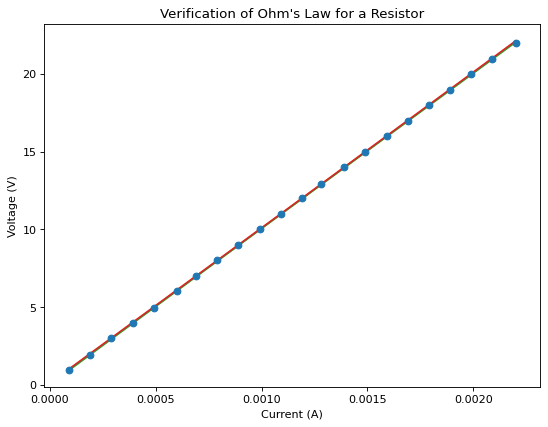

In [4]:
xi = df['Current']
yi = df['Voltage']
sigmaxi = df['dCurrent']
sigmayi = df['dVoltage']

##############################

from scipy.odr import *

def fitfunction(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x + B[1]

linear = Model(fitfunction) # create a Model object based on the fitfuncion we have defined
mydata = RealData(xi, yi, sx=sigmaxi, sy=sigmayi) # create a data object based on our data, include errors.
myodr = ODR(mydata, linear, beta0=[1., 2.]) # create a fitting object, based on the data, fit Model, and an intial set of parameters.
myoutput = myodr.run()  # run the fitting process to get optimized parameters!

myoutput.pprint() # print out the result of the fit

# Now assign the important fit results to some more convenient variables.

popt = myoutput.beta # the vector of optimized parameters
pcov = myoutput.cov_beta # the covariance matrix
perr = myoutput.sd_beta # the vector of ERRORS in the optimized parameters

# The following lines generate upper and lower 99% "Confidence Bands" on the fit, for visualization
# purposes.

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(pi,xi) for pi in ps])

lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)
middle = (lower+upper)/2.0

print()
print ("Final Result: Y = (%0.9f +/- %0.9f) X + (%0.9f +/- %0.9f)" % (popt[0],perr[0],popt[1],perr[1]))

plt.figure(figsize=(8, 6), dpi=80)

plt.errorbar(xi, yi, xerr=sigmaxi, yerr=sigmayi, fmt='o', capsize=2, capthick=1)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)

#########################

plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.title('Verification of Ohm\'s Law for a Resistor')
plt.show()

## Analysis of Resistor Result

First of all, we see that this is a very good fit.  The upper and lower error band lines
are barely distinguishable from one another.  This tells us that we are able to determine the voltage for a given current quite accurately!  Cool!

Second, we see that the result for the y-intercept = $(0.085 \pm 0.015)$ Volts, and is not consistent with zero.  This is inconsistent with our expectations. However, the plot does appear to be linear, and the y-intercept is at least close to zero.

Third, we see that slope that we are trying to determine is
$(10002.9 \pm 11.4)$ Volts/Amp, and according to the theory, this should be the resistance value. A Volt/Amp is the same as an $\Omega$.


From measurements using the Ohm-meter setting on the DVM, the resistance was measured
to be $(9.90 \pm 0.01) k\Omega = (9900 \pm 10) \Omega$.

Our measured slope is close to, but inconsistent with this measured value.

## Part II - Light Bulb

At first glance, we might expect that a light bulb behaves like a typical resistor.  So, our first analysis will be the same as in the previous section; we will plot Voltage vs. Current through the light bulb.

Beta: [32.1151247  -1.92712537]
Beta Std Error: [1.12527642 0.19124957]
Beta Covariance: [[ 0.07335326 -0.01183555]
 [-0.01183555  0.00211886]]
Residual Variance: 17.26231343583239
Inverse Condition #: 0.04799631935926179
Reason(s) for Halting:
  Sum of squares convergence

Final Result: Y = (32.115124701 +/- 1.125276417) X + (-1.927125367 +/- 0.191249570)


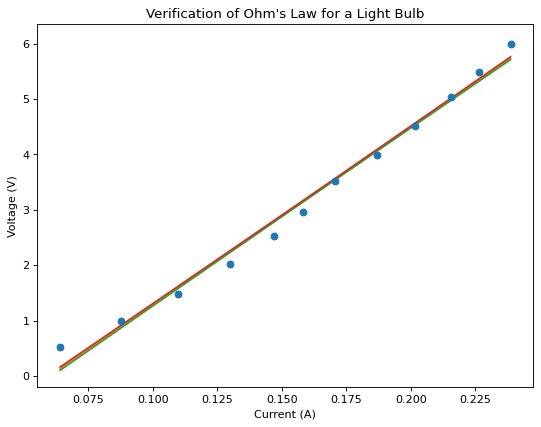

In [5]:
xi = df2['Current']
yi = df2['Voltage']
sigmaxi = df2['dCurrent']
sigmayi = df2['dVoltage']

##############################

from scipy.odr import *

def fitfunction(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x + B[1]

linear = Model(fitfunction) # create a Model object based on the fitfuncion we have defined
mydata = RealData(xi, yi, sx=sigmaxi, sy=sigmayi) # create a data object based on our data, include errors.
myodr = ODR(mydata, linear, beta0=[1., 2.]) # create a fitting object, based on the data, fit Model, and an intial set of parameters.
myoutput = myodr.run()  # run the fitting process to get optimized parameters!

myoutput.pprint() # print out the result of the fit

# Now assign the important fit results to some more convenient variables.

popt = myoutput.beta # the vector of optimized parameters
pcov = myoutput.cov_beta # the covariance matrix
perr = myoutput.sd_beta # the vector of ERRORS in the optimized parameters

# The following lines generate upper and lower 99% "Confidence Bands" on the fit, for visualization
# purposes.

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(pi,xi) for pi in ps])

lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)
middle = (lower+upper)/2.0

print()
print ("Final Result: Y = (%0.9f +/- %0.9f) X + (%0.9f +/- %0.9f)" % (popt[0],perr[0],popt[1],perr[1]))

plt.figure(figsize=(8, 6), dpi=80)

plt.errorbar(xi, yi, xerr=sigmaxi, yerr=sigmayi, fmt='o', capsize=2, capthick=1)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)

#########################

plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.title('Verification of Ohm\'s Law for a Light Bulb')
plt.show()

## Analysis of Light-Bulb Result

First of all, we see that this is a NOT a very good fit!!!  It appears that the light bulb does NOT obey Ohm's Law.  Why?  It seems like maybe a quadratic fit might be better, in fact.

Let's try that instead!!  We will learn something really interesting, in fact!

Beta: [67.67711794 11.29464667 -0.5226407 ]
Beta Std Error: [6.83481546 2.12991261 0.15329788]
Beta Covariance: [[ 2.89647985e+01 -8.90772434e+00  6.00609012e-01]
 [-8.90772434e+00  2.81281064e+00 -1.96538876e-01]
 [ 6.00609012e-01 -1.96538876e-01  1.45709950e-02]]
Residual Variance: 1.6128095068606938
Inverse Condition #: 0.002112771200938263
Reason(s) for Halting:
  Sum of squares convergence

Final Result: Y = (67.677117941 +/- 6.834815461) X^ + (11.294646666 +/- 2.129912612) X + (-0.522640697 +/- 0.153297877)


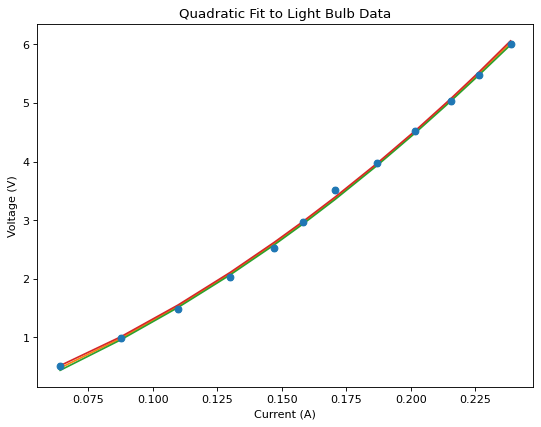

In [6]:
xi = df2['Current']
yi = df2['Voltage']
sigmaxi = df2['dCurrent']
sigmayi = df2['dVoltage']

##############################

from scipy.odr import *

def fitfunction(B, x):
    '''Quadratic function y = a*x**2 + b*x + c'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x**2 + B[1]*x + B[2]

linear = Model(fitfunction) # create a Model object based on the fitfuncion we have defined
mydata = RealData(xi, yi, sx=sigmaxi, sy=sigmayi) # create a data object based on our data, include errors.
myodr = ODR(mydata, linear, beta0=[1., 2., 3.]) # create a fitting object, based on the data, fit Model, and an intial set of parameters.
myoutput = myodr.run()  # run the fitting process to get optimized parameters!

myoutput.pprint() # print out the result of the fit

# Now assign the important fit results to some more convenient variables.

popt = myoutput.beta # the vector of optimized parameters
pcov = myoutput.cov_beta # the covariance matrix
perr = myoutput.sd_beta # the vector of ERRORS in the optimized parameters

# The following lines generate upper and lower 99% "Confidence Bands" on the fit, for visualization
# purposes.

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(pi,xi) for pi in ps])

lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)
middle = (lower+upper)/2.0

print()
print ("Final Result: Y = (%0.9f +/- %0.9f) X^ + (%0.9f +/- %0.9f) X + (%0.9f +/- %0.9f)" % (popt[0],perr[0],popt[1],perr[1],popt[2],perr[2]))

plt.figure(figsize=(8, 6), dpi=80)

plt.errorbar(xi, yi, xerr=sigmaxi, yerr=sigmayi, fmt='o', capsize=2, capthick=1)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)

#########################

plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.title('Quadratic Fit to Light Bulb Data')
plt.show()

So, now this is a much better fit!  The physics effect here is that light-bulbs are actually NON-Ohmic devices.  As the current increases, the temperature of the filament
in the light bulb increases.  This causes the resistance to increase. The resistance is DEFINED to be the slop of V vs. I graph at any point.  Now that we have a nice quadratic fit, we can calculate this slope (and hence the resistance), using:

$V = aI^2 + bI + c$

$R = \frac{dV}{dI} = 2aI + b$

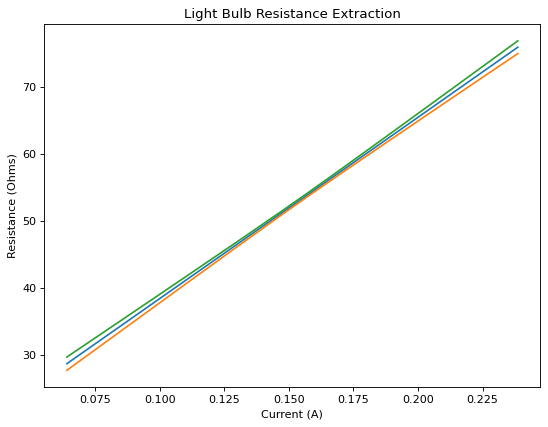

In [7]:
def resistancefunction(B, x):
    '''Resistance function R = 2*a*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return 2*B[0]*x + B[1]

# Construct the Ropt and Rcov arrays
Ropt = [2.0*popt[0],popt[1]]
Rcov = [[pcov[0][0],pcov[0][1]],[pcov[1][0],pcov[1][1]]]

# Sample the resistance function
ps = np.random.multivariate_normal(Ropt,Rcov,10000)
ysample=np.asarray([resistancefunction(pi,xi) for pi in ps])

# Construct the upper, lower, and middle lines
lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)
middle = (lower+upper)/2.0

# Plot things
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)

#########################

plt.xlabel('Current (A)')
plt.ylabel('Resistance (Ohms)')
plt.title('Light Bulb Resistance Extraction')
plt.show() 


We see from this analysis that the resistance varies from about 30 Ohms at low current to about 70 Ohms at the maximum current used in the experiment, and our data falls under this threshold. This generally increasing trend is what we expect from the theory. 

## Part III - Diode

For this part of the experiment, we operate the diode in two configurations - forward bias and reverse bias.  For the reverse bias situation, we expect zero current to flow.  For the forward bias situation, the current through the diode is described by:

$I = I_0(e^{\frac{e\Delta V}{\eta k T}} - 1)$

where $I_0$ is the so-called dark saturation current, $e$ is the charge of the electron, $k$ is Boltzmann's constant, $T$ is the temperature, $\Delta V$ is the voltage across the diode, and $\eta$ is an efficiency factor for the diode.  So, clearly, we expect a very non-linear dependence!

If we assume that we are operating at room temperature (293 K), we can calculate that:

$\frac{e}{kT} = \frac{1.6 \times 10^{-19}}{(1.381 \times 10^{-23})(293)} = \frac{1}{0.0253}$

Thus, we have now that:

$I = I_0(e^{\frac{\Delta V}{0.0253 \eta}} - 1)$

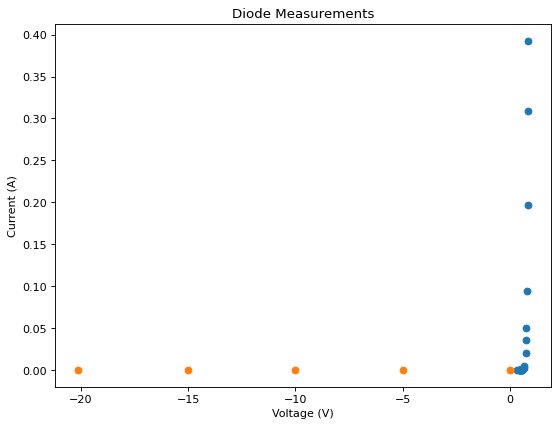

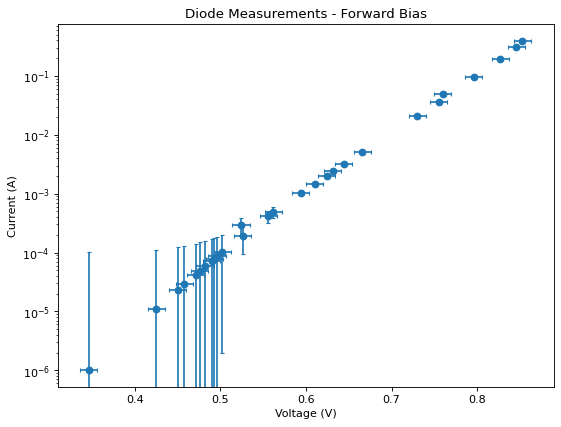

In [8]:
xi1 = df3['Voltage']
yi1 = df3['Current']
sigmaxi1 = df3['dVoltage']
sigmayi1 = df3['dCurrent']

xi2 = df4['Voltage']
yi2 = df4['Current']
sigmaxi2 = df4['dVoltage']
sigmayi2 = df4['dCurrent']

plt.figure(figsize=(8, 6), dpi=80)

plt.errorbar(xi1, yi1, xerr=sigmaxi1, yerr=sigmayi1, fmt='o', capsize=2, capthick=1)
plt.errorbar(xi2, yi2, xerr=sigmaxi2, yerr=sigmayi2, fmt='o', capsize=2, capthick=1)

#########################

plt.ylabel('Current (A)')
plt.xlabel('Voltage (V)')
plt.title('Diode Measurements')
plt.show()

plt.figure(figsize=(8, 6), dpi=80)

plt.errorbar(xi1, yi1, xerr=sigmaxi1, yerr=sigmayi1, fmt='o', capsize=2, capthick=1)

#########################

plt.ylabel('Current (A)')
plt.xlabel('Voltage (V)')
plt.title('Diode Measurements - Forward Bias')
#plt.xlim(0.3,1.0)
plt.yscale('log')
plt.show()





Beta: [1.34448856e-09 2.27736763e+01]
Beta Std Error: [1.43513382e-10 1.51023672e-01]
Beta Covariance: [[ 3.02851024e-19 -3.15254451e-10]
 [-3.15254451e-10  3.35377791e-01]]
Residual Variance: 0.06800733452391092
Inverse Condition #: 0.010363893586002412
Reason(s) for Halting:
  Sum of squares convergence

Final Result: Y = (1.344488558e-09 +/- 1.435133823e-10) e^(2.277367626e+01 +/- 1.510236723e-01)


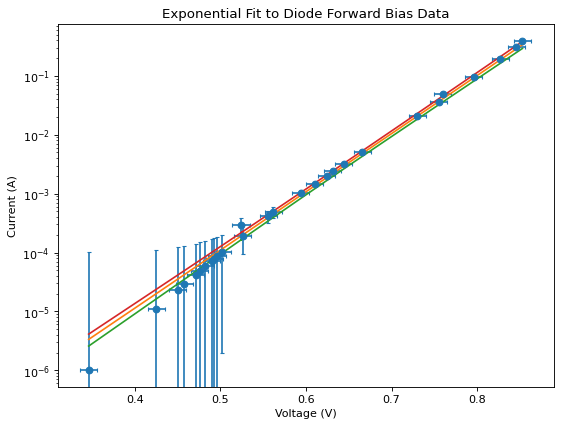

In [9]:
yi = df3['Current']
xi = df3['Voltage']
sigmayi = df3['dCurrent']
sigmaxi = df3['dVoltage']

##############################

from scipy.odr import *

def fitfunction(B, x):
    '''Exponential Function - y = A(e^(kV) - 1)'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*(np.exp(B[1]*x) - 1.0)

linear = Model(fitfunction) # create a Model object based on the fitfuncion we have defined
mydata = RealData(xi, yi, sx=sigmaxi, sy=sigmayi) # create a data object based on our data, include errors.
myodr = ODR(mydata, linear, beta0=[1.6E-9, 22.4,]) # create a fitting object, based on the data, fit Model, and an intial set of parameters.
myoutput = myodr.run()  # run the fitting process to get optimized parameters!

myoutput.pprint() # print out the result of the fit

# Now assign the important fit results to some more convenient variables.

popt = myoutput.beta # the vector of optimized parameters
pcov = myoutput.cov_beta # the covariance matrix
perr = myoutput.sd_beta # the vector of ERRORS in the optimized parameters

# The following lines generate upper and lower 99% "Confidence Bands" on the fit, for visualization
# purposes.

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(pi,xi) for pi in ps])

lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)
middle = (lower+upper)/2.0

print()
print ("Final Result: Y = (%0.9e +/- %0.9e) e^(%0.9e +/- %0.9e)" % (popt[0],perr[0],popt[1],perr[1]))

plt.figure(figsize=(8, 6), dpi=80)

plt.errorbar(xi, yi, xerr=sigmaxi, yerr=sigmayi, fmt='o', capsize=2, capthick=1)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)

#########################

plt.ylabel('Current (A)')
plt.xlabel('Voltage (V)')
plt.title('Exponential Fit to Diode Forward Bias Data')
plt.yscale('log')
plt.show()

In [10]:
k = popt[1]
dk = perr[1]

eta = 1.0/(0.0253*k)
deta = eta*(dk/k)

print ('eta = (%0.2f +/- %0.2f)' % (eta,deta))

eta = (1.74 +/- 0.01)


https://www.electrical4u.com/diode-current-equation/

As can be seen at the link above, for an ideal diode, we expect $\eta = 1$.  For silicon diodes, we expect $\eta \approx 2$.

##Analysis of Diode Data

The high uncertainties near the beginning of the chart, which is due to the fact it is a log graph in order to make the data appear more linear, this matches what was observed during the expirement where very small adjustments of the knob led to large jumps in the mA. Acording to the link above most diodes should fall between 1 and 2, the result from the data above does fall under this threshold. It is higher than an ideal diode however is lower than a sillicon diode, however it is closer to the sillicon diode than the ideal diode. After looking at the part number online, it is indicated that it is a sillicon diode, which would make sense since our eta was closer to that od a sillicon diode. It was also consistent with the other data people used in the class